# Mean-Variance Optimization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
#Завантажуємо датасет
ticks = ["SPY", "EFA", "EEM", "PSP", "QAI", "HYG", "DBC", "IYR", "IEF", "BWX", "TIP", "SHV"]
start_date = "2014-01-01"
end_date = "2023-01-01"

df = yf.download(ticks, start_date, end_date)["Adj Close"]

[*********************100%%**********************]  12 of 12 completed


In [3]:
#Вибираємо дані за останній день місяця
price = df.resample("M").last()

In [4]:
#прибуток
ret = price.pct_change().dropna()

#надлишковий прибуток
ex_ret = ret.subtract(ret["SHV"], axis = 0)
ex_ret = ex_ret.drop(columns = ["SHV"])
ex_ret.head()

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2014-02-28,0.022152,0.050060,0.033597,0.061130,0.022903,0.003393,0.047328,0.066141,0.020688,0.045334,0.004186
2014-03-31,0.003018,-0.000473,0.038663,-0.004683,-0.000906,-0.005701,0.001361,-0.016350,-0.004520,0.008205,-0.005415
2014-04-30,0.010088,0.011103,0.007803,0.016667,0.004205,0.007583,0.030294,-0.023868,0.002396,0.006951,0.013203
2014-05-31,0.001437,-0.014388,0.029518,0.015954,0.012064,0.018254,0.027969,0.010961,0.014339,0.023207,0.020013
2014-06-30,0.015972,0.021129,0.024018,0.009208,0.006120,-0.002168,0.010126,0.028657,0.009425,0.020644,0.003698


## 1. Обчислити та відобразити середнє значення та волатильність надлишкової прибутковості кожного активу. (Нагадаймо, ми використовуємо волатильність для позначення стандартного відхилення.)

In [5]:
#Середня прибутковість за місяць
ex_ret_mean = ex_ret.mean()
ex_ret_mean

BWX   -0.002049
DBC    0.000972
EEM    0.002322
EFA    0.003052
HYG    0.001713
IEF    0.000368
IYR    0.005792
PSP    0.000489
QAI    0.000302
SPY    0.009052
TIP    0.001010
dtype: float64

In [6]:
#Волатильність
ex_ret_std = ex_ret.std()
ex_ret_std

BWX    0.022992
DBC    0.052209
EEM    0.049687
EFA    0.043485
HYG    0.022532
IEF    0.017104
IYR    0.048563
PSP    0.063243
QAI    0.015026
SPY    0.044089
TIP    0.014446
dtype: float64

## 2. Які активи мають найкращі та найгірші коефіцієнти Шарпа?

$$SR(w^p) = \frac{\mu^p - r^f}{\sigma^p}$$

In [7]:
mu_p = ret.drop(columns = ["SHV"]).mean()
r_f = ret["SHV"].mean()
sigma_p = ret.drop(columns = ["SHV"]).std()

SR = (mu_p - r_f).div(sigma_p)
SR = SR.sort_values(ascending = False).to_frame().reset_index()
SR.columns = ["Ticks", "SR"]
SR

,Ticks,SR
0,SPY,0.205986
1,IYR,0.119530
2,HYG,0.076200
3,EFA,0.070271
4,TIP,0.069459
5,EEM,0.046742
6,IEF,0.021129
7,QAI,0.020088
8,DBC,0.018677
9,PSP,0.007752


In [8]:
# найкращий коефіцієнт Шарпа
SR.iloc[0,:]

Ticks         SPY
SR       0.205986
Name: 0, dtype: object

In [9]:
# нйгірший коефіціяєнт Шарпа
SR.iloc[-1,:]

Ticks        BWX
SR      -0.08821
Name: 10, dtype: object

## 3. Розрахувати кореляційну матрицю доходів. Яка пара має найбільшу кореляцію? Яка найменшу?

In [10]:
correlation_matrix = ex_ret.corr()
correlation_matrix

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
BWX,1.000000,0.202022,0.645757,0.552969,0.576703,0.548650,0.449717,0.515558,0.636100,0.426230,0.669452
DBC,0.202022,1.000000,0.493212,0.535021,0.488763,-0.352468,0.296075,0.472511,0.505783,0.443972,0.128272
EEM,0.645757,0.493212,1.000000,0.806688,0.670101,0.035694,0.537631,0.719245,0.817292,0.675299,0.418331
EFA,0.552969,0.535021,0.806688,1.000000,0.789521,0.004571,0.676977,0.909642,0.893733,0.869679,0.452417
HYG,0.576703,0.488763,0.670101,0.789521,1.000000,0.146465,0.694211,0.829209,0.837563,0.808391,0.600165
IEF,0.548650,-0.352468,0.035694,0.004571,0.146465,1.000000,0.244236,0.020811,0.111515,-0.018233,0.706036
IYR,0.449717,0.296075,0.537631,0.676977,0.694211,0.244236,1.000000,0.729068,0.709724,0.769053,0.629643
PSP,0.515558,0.472511,0.719245,0.909642,0.829209,0.020811,0.729068,1.000000,0.889854,0.909872,0.523829
QAI,0.636100,0.505783,0.817292,0.893733,0.837563,0.111515,0.709724,0.889854,1.000000,0.878317,0.544924
SPY,0.426230,0.443972,0.675299,0.869679,0.808391,-0.018233,0.769053,0.909872,0.878317,1.000000,0.480186


In [11]:
# максимальне значення кореляції (не враховуючи діагональних значень)
max_corr_per_tick = np.abs(correlation_matrix - np.eye(correlation_matrix.shape[0])).idxmax()
corr_dict = {}
for i,j in max_corr_per_tick.items():
    corr_dict[(i,j)] = correlation_matrix.loc[i,j]
    
max_corr = max(corr_dict, key=corr_dict.get)
max_corr

('PSP', 'SPY')

In [12]:
# мінімальне значення кореляції
min_corr_per_tick = correlation_matrix.idxmin()
corr_dict = {}
for i,j in min_corr_per_tick.items():
    corr_dict[(i,j)] = correlation_matrix.loc[i,j]
    
min_corr = min(corr_dict, key=corr_dict.get)
min_corr

('DBC', 'IEF')

## 4. Наскільки добре спрацювали TIPS у нашій вибірці? Чи перевершили вони внутрішні облігації (IEF)? Іноземні облігації (foreign bonds)?

In [13]:
# TIPS, IEF, HYG (іноземна облігація для US)
print("Коефіцієнт Шарпа:")
print(SR[SR["Ticks"].isin(["TIP", "IEF", "HYG"])])

print("\nСередня надлишкова прибутковість:")
print(ex_ret_mean.loc[["TIP", "IEF", "HYG"]].sort_values(ascending = False))

Коефіцієнт Шарпа:
  Ticks        SR
2   HYG  0.076200
4   TIP  0.069459
6   IEF  0.021129

Середня надлишкова прибутковість:
HYG    0.001713
TIP    0.001010
IEF    0.000368
dtype: float64


TIP у нашій вибірці спрацювали краще, ніж внутрішні облігації, оскільки коефіцієнт Шарпа та середня надлишкова прибутковість є більшою ніж відповідні показники для IEF. 

Щодо іноземних облігацій HYG, то за обома параметрами вони спрацювали краще за TIPS та внутрішні облігації.

## 3. MV frontier. Обчислити та відобразити ваги дотичних портфелів (tangency portfolio), $w^t$.

$$w^t = (\frac{1}{1' \Sigma^{-1} \mu})\Sigma^{-1} \mu$$

In [14]:
mu = ret.drop(columns = ["SHV"]).mean().to_numpy()
Sigma = ret.drop(columns = ["SHV"]).cov().to_numpy()
Sigma_inv = np.linalg.inv(Sigma)

w_t = (1/(np.ones((1, len(mu))).dot(Sigma_inv).dot(mu)))*Sigma_inv.dot(mu)

In [15]:
w_t

array([-1.95671006,  0.26597689,  0.78696505,  0.69158538,  0.70188787,
        2.48840519, -0.51588125, -2.59237911, -4.84539098,  4.66510373,
        1.31043729])

## 4. Обчисліть очікуваний прибуток, волатильність і коефіцієнт Шарпа для дотичного портфеля, що відповідає $w^t$.

Надлишкова прибутковість: $\tilde{\mu} = \mu - 1r^f$

Середній (очікуваний) прибуток: $\mu^p = (1 - w'1)r^f + w'\mu = r^f + w'\tilde{\mu}$

Середня (очікувана) надлишкова прибутковість: $\tilde{\mu}^p = w'\tilde{\mu}$

Волатильність: $\sigma = \frac{|\tilde{\mu}^p|}{\sqrt{\tilde{\mu}'\Sigma^{-1}\tilde{\mu}}}$

Коефіцієнт Шарпа: $SR(w^*) = \pm \sqrt{\tilde{\mu}'\Sigma^{-1}\tilde{\mu}}$

In [16]:
mu = ret.drop(columns = ["SHV"]).mean().to_numpy()
r_f = ret["SHV"].mean()
Sigma = ret.drop(columns = ["SHV"]).cov().to_numpy()
Sigma_inv = np.linalg.inv(Sigma)

# надлишкова прибутковість
tilde_mu = mu - np.ones((len(mu)))*r_f

# очікуваний прибуток
mu_p = r_f + (w_t.T).dot(tilde_mu)
print("Очікуваний прибуток: {}".format(mu_p))

# очікувана надлишкова прибутковість
tilde_mu_p = (w_t.T).dot(tilde_mu)
print("Очікувана надлишкова прибутковість: {}".format(tilde_mu_p))

# волатильність
vol = np.abs(tilde_mu_p)/np.sqrt((tilde_mu.T).dot(Sigma_inv).dot(tilde_mu))
print("Волатильність: {}".format(vol))

# коефіцієнт  Шарпа
SR = np.sqrt((tilde_mu.T).dot(Sigma_inv).dot(tilde_mu))
print("Коефіцієнт Шарпа: +{} або -{}".format(SR, SR))

Очікуваний прибуток: 0.04879483134052983
Очікувана надлишкова прибутковість: 0.04816157471812815
Волатильність: 0.0854044132684951
Коефіцієнт Шарпа: +0.5639237233176393 або -0.5639237233176393


## 5. Обчислити та відобразити ваги портфелів MV із цільовою прибутковістю $\mu^p = 0.015$. Порахувати очікуваний прибуток, волатильність і коефіцієнт Шарпа для $w^p$.

Ваги портфелів MV: $w^p = \delta w^t + (1 - \delta) w^v$, де $w^t = (\frac{1}{1' \Sigma^{-1} \mu})\Sigma^{-1} \mu$, і $w^v = (\frac{1}{1' \Sigma^{-1} 1})\Sigma^{-1} 1$

Цільова прибутковість: $0.015 = (w^p)'\mu$, і звідси:
$$0.015 = (w^p)'\mu, \quad 0.015 = (\delta w^t + (1 - \delta) w^v))'\mu = (\delta (w^t)' + (1 - \delta) (w^v)')\mu = \delta ((w^t)' - (w^v)')\mu + (w^v)'\mu, \quad \delta = \frac{0.015 - (w^v)'\mu}{((w^t)' - (w^v)')\mu}$$

Середній (очікуваний) прибуток: $\mu^p = (w^p)'\mu$

Волатильність: $\sigma^p = \sqrt{(w^p)'\Sigma w^p}$

Коефіцієнт Шарпа: $SR(w^p) = \frac{\mu^p - r^f}{\sigma^p}$

In [17]:
mu = ret.drop(columns = ["SHV"]).mean()
r_f = ret["SHV"].mean()
Sigma = ret.drop(columns = ["SHV"]).cov()
Sigma_inv = np.linalg.inv(Sigma)

# ваги w^p
ones = np.ones((len(mu), 1))
w_t = ((1/(ones.T).dot(Sigma_inv).dot(mu))*Sigma_inv.dot(mu)).flatten()
w_v = ((1/(ones.T).dot(Sigma_inv).dot(ones))*Sigma_inv.dot(ones)).flatten()
delta = (0.015 - (w_v.T).dot(mu))/(w_t.T - w_v.T).dot(mu)

w_p = delta*w_t + (1 - delta)*w_v
w_p

array([-0.68940946,  0.07784613,  0.17895109,  0.2181814 ,  0.21978376,
        0.71795783, -0.18886946, -0.87270326, -0.66185207,  1.34988687,
        0.65022716])

In [18]:
# очікуваний прибуток
mu_p = (w_p.T).dot(mu)
print("Очікуваний прибуток: {} - збігається з цільовою прибутковістю". format(mu_p))

# волатильність
sigma_p = np.sqrt((w_p.T).dot(Sigma).dot(w_p))
print("Волатильність: {}".format(sigma_p))

# коефіцієнт Шарпа
SR = (mu_p - r_f)/sigma_p
print("Коефіцієнт Шарпа: {}".format(SR))

Очікуваний прибуток: 0.015000000000000003 - збігається з цільовою прибутковістю
Волатильність: 0.027033614105112184
Коефіцієнт Шарпа: 0.5314399814148972


## 6. Обчисліть прибуток рівнозваженого портфеля за вибіркою. Перерахуйте вектор ваг для очікуваного прибутку $μ^p = 0.015$. Обчисліть його середнє значення, волатильність і Коефіцієнт Шарпа.

In [19]:
mu = ret.drop(columns = ["SHV"]).mean()
r_f = ret["SHV"].mean()
Sigma = ret.drop(columns = ["SHV"]).cov()
Sigma_inv = np.linalg.inv(Sigma)

In [20]:
# ваги рівноваженого портфеля до перерахунку
w = np.full(len(mu), 1/len(mu))
w

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909])

$0.015 = (w^p)'\mu$, де $w^p = cw$, де $c$ - число, а $w$ - вектор ваг рівнозваженого портфеля

In [21]:
# ваги після перерахунку
c = 0.015/(w.T).dot(mu)
w_p = c*w
w_p

array([0.50017547, 0.50017547, 0.50017547, 0.50017547, 0.50017547,
       0.50017547, 0.50017547, 0.50017547, 0.50017547, 0.50017547,
       0.50017547])

In [22]:
# очікуваний прибуток
mu_p = (w_p.T).dot(mu)
print("Очікуваний прибуток: {} - збігається з цільовою прибутковістю". format(mu_p))

# волатильність
sigma_p = np.sqrt((w_p.T).dot(Sigma).dot(w_p))
print("Волатильність: {}".format(sigma_p))

# коефіцієнт Шарпа
SR = (mu_p - r_f)/sigma_p
print("Коефіцієнт Шарпа: {}".format(SR))

Очікуваний прибуток: 0.015 - збігається з цільовою прибутковістю
Волатильність: 0.1553231679830378
Коефіцієнт Шарпа: 0.0924958173604034


## 7. Обчисліть прибуток портфеля «паритету ризику». Паритет ризику – це портфель з вагами активів, пропорційних до волатильності повної вибірки: $w^i = \frac{1}{\sigma i}$. Це дасть $\sigma 𝑖$ вектор ваг, $w$. Змінити масштаб, щоб отримати очікуване значення прибутку $\mu^p = 0.015$. Порівняйте з портфелем з п.5.

In [23]:
mu = ret.drop(columns = ["SHV"]).mean()
r_f = ret["SHV"].mean()
sigma = ret.drop(columns = ["SHV"]).std()
Sigma = ret.drop(columns = ["SHV"]).cov()
Sigma_inv = np.linalg.inv(Sigma)

In [24]:
# портфель паритету ризику
w = 1/sigma.to_numpy()
w = w/np.sum(w)
w

array([0.10713024, 0.04781326, 0.05009379, 0.05729095, 0.11067677,
       0.14277139, 0.05134887, 0.03943165, 0.165777  , 0.05661813,
       0.17104795])

$0.015 = (w^p)'\mu$, де $w^p = cw$, де $c$ - число, а $w$ - вектор ваг портфеля паритету ризику

In [25]:
# ваги після перерахунку
c = 0.015/(w.T).dot(mu)
w_p = c*w
w_p

array([0.78556096, 0.35060343, 0.36732604, 0.42010108, 0.81156683,
       1.04690915, 0.37652923, 0.28914303, 1.21560387, 0.41516745,
       1.25425452])

In [26]:
# очікуваний прибуток
mu_p = (w_p.T).dot(mu)
print("Очікуваний прибуток: {} - збігається з цільовою прибутковістю". format(mu_p))

# волатильність
sigma_p = np.sqrt((w_p.T).dot(Sigma).dot(w_p))
print("Волатильність: {}".format(sigma_p))

# коефіцієнт Шарпа
SR = (mu_p - r_f)/sigma_p
print("Коефіцієнт Шарпа: {}".format(SR))

Очікуваний прибуток: 0.014999999999999998 - збігається з цільовою прибутковістю
Волатильність: 0.15263731497546626
Коефіцієнт Шарпа: 0.09412340213077987


Порівняно з портфелем з п.5 коефіцієнт Шарпа значно зменшився, що можна пояснити тим, що волатильність портфеля після перерахування ваг зросла.

## 8. Оцініть, наскільки зміниться коефіцієнт Шарпа, якщо ми виключимо TIPS з інвестиційного набору (потрфель з 10 активів.) Подивіться, наскільки це змінює очікуваний прибуток та волатильність в умовах задачі 5.

Ваги портфелів MV: $w^p = \delta w^t + (1 - \delta) w^v$, де $w^t = (\frac{1}{1' \Sigma^{-1} \mu})\Sigma^{-1} \mu$, і $w^v = (\frac{1}{1' \Sigma^{-1} 1})\Sigma^{-1} 1$

Цільова прибутковість: $0.015 = (w^p)'\mu$, і звідси:
$$0.015 = (w^p)'\mu, \quad 0.015 = (\delta w^t + (1 - \delta) w^v))'\mu = (\delta (w^t)' + (1 - \delta) (w^v)')\mu = \delta ((w^t)' - (w^v)')\mu + (w^v)'\mu, \quad \delta = \frac{0.015 - (w^v)'\mu}{((w^t)' - (w^v)')\mu}$$

Середній (очікуваний) прибуток: $\mu^p = (w^p)'\mu$

Волатильність: $\sigma^p = \sqrt{(w^p)'\Sigma w^p}$

Коефіцієнт Шарпа: $SR(w^p) = \frac{\mu^p - r^f}{\sigma^p}$

In [27]:
mu = ret.drop(columns = ["SHV", "TIP"]).mean()
r_f = ret["SHV"].mean()
Sigma = ret.drop(columns = ["SHV", "TIP"]).cov()
Sigma_inv = np.linalg.inv(Sigma)

# ваги w^p
ones = np.ones((len(mu), 1))
w_t = ((1/(ones.T).dot(Sigma_inv).dot(mu))*Sigma_inv.dot(mu)).flatten()
w_v = ((1/(ones.T).dot(Sigma_inv).dot(ones))*Sigma_inv.dot(ones)).flatten()
delta = (0.015 - (w_v.T).dot(mu))/(w_t.T - w_v.T).dot(mu)

w_p = delta*w_t + (1 - delta)*w_v
w_p

array([-0.70145065,  0.12019392,  0.18396701,  0.15152269,  0.29403353,
        1.15399799, -0.16533509, -0.84596921, -0.57619424,  1.38523405])

In [28]:
# очікуваний прибуток
mu_p = (w_p.T).dot(mu)
print("Очікуваний прибуток: {}". format(mu_p))

# волатильність
sigma_p = np.sqrt((w_p.T).dot(Sigma).dot(w_p))
print("Волатильність: {}".format(sigma_p))

# коефіцієнт Шарпа
SR = (mu_p - r_f)/sigma_p
print("Коефіцієнт Шарпа: {}".format(SR))

Очікуваний прибуток: 0.015
Волатильність: 0.027356544905715062
Коефіцієнт Шарпа: 0.5251665890964528


Після вилучення TIPS з портфелю показники майже не змінилися.

## 9. Давайте розділимо вибірку, щоб обчислити портфель і потім перевірити його ефективність на іншій частині вибірки. Використовуючи лише дані до кінця 2021 року, обчисліть $w^p$ для $\mu^p = 0.015$, беручи до уваги всі 11 активів. Використовуючи ці вагові коефіцієнти, обчисліть коефіцієнт Шарпа портфеля у вибірці до кінця 2021 року. Знову використовуючи ці ваги (отримані з використанням даних до 2021 року) обчисліть коефіцієнт Шарпа портфеля на основі показників у 2022 році.

Дані до 2021 року

In [29]:
ret_2021 = ret.loc[:"2021-12-31"]

mu = ret_2021.drop(columns = ["SHV"]).mean()
r_f = ret_2021["SHV"].mean()
Sigma = ret_2021.drop(columns = ["SHV"]).cov()
Sigma_inv = np.linalg.inv(Sigma)

# ваги w^p
ones = np.ones((len(mu), 1))
w_t = ((1/(ones.T).dot(Sigma_inv).dot(mu))*Sigma_inv.dot(mu)).flatten()
w_v = ((1/(ones.T).dot(Sigma_inv).dot(ones))*Sigma_inv.dot(ones)).flatten()
delta = (0.015 - (w_v.T).dot(mu))/(w_t.T - w_v.T).dot(mu)

w_p = delta*w_t + (1 - delta)*w_v
w_p

array([-0.31206692,  0.03689374,  0.09549369, -0.03478389,  0.29273248,
        0.89745466, -0.23065095, -0.41725637, -1.25402712,  1.28814241,
        0.63806827])

In [30]:
# коефіцієнт Шарпа
SR = ((w_p.T).dot(mu) - r_f)/np.sqrt((w_p.T).dot(Sigma).dot(w_p))
print("Коефіцієнт Шарпа: {}".format(SR))

Коефіцієнт Шарпа: 0.6281201345266647


Дані 2022 року

In [31]:
# 2022
ret_2022 = ret.loc["2022-01-01":"2022-12-31"]

mu = ret_2022.drop(columns = ["SHV"]).mean()
r_f = ret_2022["SHV"].mean()
Sigma = ret_2022.drop(columns = ["SHV"]).cov()
Sigma_inv = np.linalg.inv(Sigma)

# коефіцієнт Шарпа
SR = ((w_p.T).dot(mu) - r_f)/np.sqrt((w_p.T).dot(Sigma).dot(w_p))
print("Коефіцієнт Шарпа: {}".format(SR))

Коефіцієнт Шарпа: -0.1468032312819535


Як бачимо, якщо використовувати той самий вектор ваг для іншої вибірки, то значення коефіцієнт Шарпа зміниться. У нашому випадку коефіцієнт від'ємний, що означає, що якби ми вклались у безризикові активи, то заробили б більше.

## 10. Повторно зробіть аналіз для надлишкової прибутковості (excess return). Для цього відніміть SHV від кожного загального доходу, щоб сформувати надлишковий прибуток, $\tilde{r}$.

In [32]:
# зроблено у пункті 1

## 11. Розгляньте портфель з двома активами: внутрішніми облігаціями (IEF) та захищеними облігаціями (TIP). Обчислити $w^p$ для $\tilde{\mu^p} = 0.135$. Зробіть коригування $\tilde{\mu}^{TIP}$ на $-0.0015$ (зверніть увагу на знак). Повторно обчисліть $w^p$ для $\tilde{\mu^p} = 0.135$ для цих двох активів. Як змінюється розподіл між двома активами? Що це говорить про статистичну точність рішень MV?

До коригування

In [33]:
tilde_mu = ex_ret.loc[:, ["TIP", "IEF"]].mean()
Sigma = ret.loc[:, ["TIP", "IEF"]].cov()
Sigma_inv = np.linalg.inv(Sigma)

# ваги w^p
ones = np.ones((len(tilde_mu), 1))
w_t = ((1/(ones.T).dot(Sigma_inv).dot(tilde_mu))*Sigma_inv.dot(tilde_mu)).flatten()
w_v = ((1/(ones.T).dot(Sigma_inv).dot(ones))*Sigma_inv.dot(ones)).flatten()
delta = (0.135 - (w_v.T).dot(tilde_mu))/(w_t.T - w_v.T).dot(tilde_mu)

w_p = delta*w_t + (1 - delta)*w_v
w_p

array([ 209.65127878, -208.65127878])

З коригуванням

In [34]:
tilde_mu = ex_ret.loc[:, ["TIP", "IEF"]].mean()
tilde_mu["TIP"] -= 0.0015
Sigma = ret.loc[:, ["TIP", "IEF"]].cov()
Sigma_inv = np.linalg.inv(Sigma)

# ваги w^p
ones = np.ones((len(tilde_mu), 1))
w_t = ((1/(ones.T).dot(Sigma_inv).dot(tilde_mu))*Sigma_inv.dot(tilde_mu)).flatten()
w_v = ((1/(ones.T).dot(Sigma_inv).dot(ones))*Sigma_inv.dot(ones)).flatten()
delta = (0.135 - (w_v.T).dot(tilde_mu))/(w_t.T - w_v.T).dot(tilde_mu)

w_p = delta*w_t + (1 - delta)*w_v
w_p

array([-156.94458289,  157.94458289])

Коефіцієнти в обох випадках мають велике значення за модулем. Після коригування портфель змінюється на протилежний: якщо у першому випадку в портфелі потрібна велика частка TIPS, то у другому випадку - велика частка IEF. Для задачі MV з малою кількістю асетів навіть незначні зміни в середній прибутковості впли вають на результат.

## 12. Проітеруйте задачу 9 для кожного року, не лише 2022, а саме:
### • Почніть з кінця 2014 року та обчисліть ваги MV протягом цього часу. Застосуйте їх до обчислення прибутку в наступному році (2015р.)
### • Перейдіть на рік вперед у часі та перерахуйте.
### • Так продовжуйте аж до 2021 року (із застосування ваг доданих у 2022 році).
### Порахувати очікуваний прибуток, волатильність і коефіцієнт Шарпа на основі цього динамічного підходу MV. Порівняйте їх з динамічною версією
### - рівнозваженого портфеля
### - портфеля «паритету ризику».

In [35]:
start_dates = ["2015-01-01", "2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01", "2020-01-01", "2021-01-01", "2022-01-01"]
end_dates = ["2015-12-31", "2016-12-31", "2017-12-31", "2018-12-31", "2019-12-31", "2020-12-31", "2021-12-31", "2022-12-31"]

In [36]:
def data_collection(w_p, init_SR, init_vol):
    sharpe_ratio = [init_SR]
    vol = [init_vol]
    for start,end in zip(start_dates,end_dates):
        local_ret = ret.loc[start:end]
    
        mu = local_ret.drop(columns = ["SHV"]).mean()
        r_f = local_ret["SHV"].mean()
        Sigma = local_ret.drop(columns = ["SHV"]).cov()
        Sigma_inv = np.linalg.inv(Sigma)
    
        # ваги після перерахунку
        c = 0.015/(w_p.T).dot(mu)
        w_p = c*w_p
    
        vol.append(np.sqrt((w_p.T).dot(Sigma).dot(w_p)))
        sharpe_ratio.append(((w_p.T).dot(mu) - r_f)/np.sqrt((w_p.T).dot(Sigma).dot(w_p)))
    return sharpe_ratio, vol

Звичайна динаміка

In [37]:
#починаємо з 2014
local_ret = ret.loc["2014-01-01":"2014-12-31"]
    
mu = local_ret.drop(columns = ["SHV"]).mean()
r_f = local_ret["SHV"].mean()
Sigma = local_ret.drop(columns = ["SHV"]).cov()
Sigma_inv = np.linalg.inv(Sigma)
    
# ваги w^p для 2014 року
ones = np.ones((len(mu), 1))
w_t = ((1/(ones.T).dot(Sigma_inv).dot(mu))*Sigma_inv.dot(mu)).flatten()
w_v = ((1/(ones.T).dot(Sigma_inv).dot(ones))*Sigma_inv.dot(ones)).flatten()
delta = (0.015 - (w_v.T).dot(mu))/(w_t.T - w_v.T).dot(mu)

w_p = delta*w_t + (1 - delta)*w_v

# зберігаємо коефіцієнти шарпа та волатильність
init_SR = ((w_p.T).dot(mu) - r_f)/np.sqrt((w_p.T).dot(Sigma).dot(w_p))
init_vol = np.sqrt((w_p.T).dot(Sigma).dot(w_p))

sharpe_ratio1, vol1 = data_collection(w_p, init_SR, init_vol)

Динаміка для рівнозваженого портфеля

In [38]:
#починаємо з 2014
local_ret = ret.loc["2014-01-01":"2014-12-31"]
    
mu = local_ret.drop(columns = ["SHV"]).mean()
r_f = local_ret["SHV"].mean()
Sigma = local_ret.drop(columns = ["SHV"]).cov()
Sigma_inv = np.linalg.inv(Sigma)
    
# ваги w^p для 2014 року
w_p = np.full(len(mu), 1/len(mu))

# зберігаємо коефіцієнти шарпа та волатильність
init_SR = ((w_p.T).dot(mu) - r_f)/np.sqrt((w_p.T).dot(Sigma).dot(w_p))
init_vol = np.sqrt((w_p.T).dot(Sigma).dot(w_p))

sharpe_ratio2, vol2 = data_collection(w_p, init_SR, init_vol)

Динаміка для портфелю "паритету ризику"

In [39]:
#починаємо з 2014
local_ret = ret.loc["2014-01-01":"2014-12-31"]
    
mu = local_ret.drop(columns = ["SHV"]).mean()
r_f = local_ret["SHV"].mean()
sigma = ret.drop(columns = ["SHV"]).std()
Sigma = local_ret.drop(columns = ["SHV"]).cov()
Sigma_inv = np.linalg.inv(Sigma)
    
# ваги w^p для 2014 року
w_p = 1/sigma.to_numpy()
w_p = w_p/np.sum(w_p)

# зберігаємо коефіцієнти шарпа та волатильність
init_SR = ((w_p.T).dot(mu) - r_f)/np.sqrt((w_p.T).dot(Sigma).dot(w_p))
init_vol = np.sqrt((w_p.T).dot(Sigma).dot(w_p))

sharpe_ratio3, vol3 = data_collection(w_p, init_SR, init_vol)

Порівняння

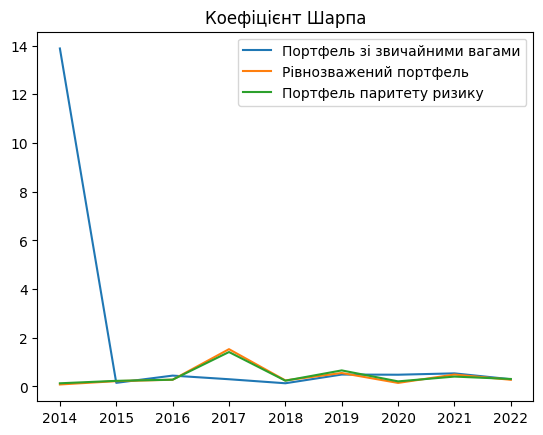

In [40]:
plt.plot(range(2014,2023,1), sharpe_ratio1, label = "Портфель зі звичайними вагами")
plt.plot(range(2014,2023,1), sharpe_ratio2, label = "Рівнозважений портфель")
plt.plot(range(2014,2023,1), sharpe_ratio3, label = "Портфель паритету ризику")
plt.title("Коефіцієнт Шарпа")
plt.legend()
plt.show()

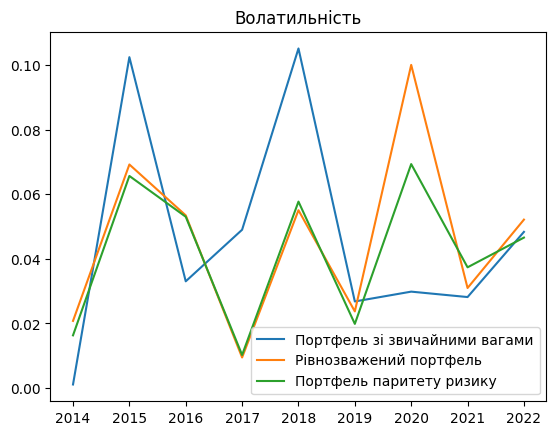

In [41]:
plt.plot(range(2014,2023,1), vol1, label = "Портфель зі звичайними вагами")
plt.plot(range(2014,2023,1), vol2, label = "Рівнозважений портфель")
plt.plot(range(2014,2023,1), vol3, label = "Портфель паритету ризику")
plt.title("Волатильність")
plt.legend()
plt.show()